In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
alz_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt.rds")
alz = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz.rds")   
alz_nt_1k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt_1k.rds")                                                   
alz_t_1k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_t_1k.rds")
alz_nt_5k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt_5k.rds")                                                   
alz_t_5k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_t_5k.rds")


#### MALE DATA

In [25]:
#Subset to Male only and treatment comparisons
alz_nt_m = subset_samples(alz_nt, Sex=="M")
m.control_abx = subset_samples(alz_nt_m, Treatment !="Abx_FMT")
m.control_abxfmt = subset_samples(alz_nt_m, Treatment !="Abx")
m.abx_abxfmt = subset_samples(alz_nt_m, Treatment !="Control")
#Remove empty ASVs
m.control_abx = prune_samples(sample_sums(m.control_abx)>0, m.control_abx)
m.control_abxfmt = prune_samples(sample_sums(m.control_abxfmt)>0, m.control_abxfmt)
m.abx_abxfmt = prune_samples(sample_sums(m.abx_abxfmt)>0, m.abx_abxfmt)
#Get OTU tables
m.control_abx.otu = data.frame(otu_table(m.control_abx))
m.control_abxfmt.otu = data.frame(otu_table(m.control_abxfmt))
m.abx_abxfmt.otu = data.frame(otu_table(m.abx_abxfmt))
#Get Meta tables
m.control_abx.meta = data.frame(sample_data(m.control_abx))
m.control_abxfmt.meta = data.frame(sample_data(m.control_abxfmt))
m.abx_abxfmt.meta = data.frame(sample_data(m.abx_abxfmt))

In [40]:
#MALE
#Read in/out to format for ANCOM
m.control_abx.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/m.control_abx.otu.csv")
m.control_abxfmt.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/m.control_abxfmt.otu.csv")
m.abx_abxfmt.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/m.abx_abxfmt.otu.csv")

m.control_abx.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/m.control_abx.meta.csv")
m.control_abxfmt.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/m.control_abxfmt.meta.csv")
m.abx_abxfmt.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/m.abx_abxfmt.meta.csv")



### MALES

#### Control vs ABX

In [55]:
#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=m.control_abx.otu,
                           Vardat=m.control_abx.meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Treatment",
                           #adj.formula=FALSE,
                           adj.formula=FALSE, #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

male.control_abx.ancom = comparison_test$W.taxa
#write.csv(male.control_abx.ancom, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/male.control_abx.ancom.csv")
saveRDS(comparison_test, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/male.control_abx.fullancom.RDS")

#### Control vs ABX_FMT

In [56]:
comparison_test=ANCOM.main(OTUdat=m.control_abxfmt.otu,
                           Vardat=m.control_abxfmt.meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Treatment",
                           #adj.formula=FALSE,
                           adj.formula=FALSE, #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

male.control_abxfmt.ancom = comparison_test$W.taxa
#write.csv(male.control_abxfmt.ancom, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/male.control_abxfmt.ancom.csv")
saveRDS(comparison_test, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/male.control_abxfmt.fullancom.RDS")

#### ABX vs ABX_FMT

In [54]:
comparison_test=ANCOM.main(OTUdat=m.abx_abxfmt.otu,
                           Vardat=m.abx_abxfmt.meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Treatment",
                           adj.formula=FALSE,
                           adj.formula=FALSE, covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, 2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

male.abx_abxfmt.ancom = comparison_test$W.taxa
write.csv(male.abx_abxfmt.ancom, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/male.abx_abxfmt.ancom.csv")
saveRDS(comparison_test, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/male.abx_abxfmt.fullancom.RDS")


### FEMALE DATA

In [46]:
#Subset to Female only and treatment comparisons
alz_nt_f = subset_samples(alz_nt, Sex=="F")
#Remove empty ASVs
alz_nt_f = prune_samples(sample_sums(alz_nt_f)>0, alz_nt_f)
#Get OTU tables
alz_nt_f.otu = data.frame(otu_table(alz_nt_f))
#Get Meta tables
alz_nt_f.meta = data.frame(sample_data(alz_nt_f))

In [57]:
#Read in/out to format for ANCOM
alz_nt_f.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/alz_nt_f.otu.csv")
alz_nt_f.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/alz_nt_f.meta.csv")


#### Control by ABX

In [58]:
comparison_test=ANCOM.main(OTUdat=alz_nt_f.otu,
                           Vardat=alz_nt_f.meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Treatment",
                           #adj.formula=FALSE,
                           adj.formula=FALSE, #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

female.control_abx.ancom = comparison_test$W.taxa
#write.csv(female.control_abx.ancom, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/female.control_abx.ancom.csv")
saveRDS(comparison_test, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/female.control_abx.fullancom.RDS")

#### MALE/FEMALE CONTROLS & ABX TREATMENTS

In [54]:
#Subset to Control and ABX only for sex comparisons
alz_nt_control = subset_samples(alz_nt, Treatment=="Control")
alz_nt_abx = subset_samples(alz_nt, Treatment=="Abx")
#Remove empty ASVs
alz_nt_control = prune_samples(sample_sums(alz_nt_control)>0, alz_nt_control)
alz_nt_abx = prune_samples(sample_sums(alz_nt_abx)>0, alz_nt_abx)
#Get OTU tables
alz_nt_control.otu = data.frame(otu_table(alz_nt_control))
alz_nt_abx.otu = data.frame(otu_table(alz_nt_abx))
#Get Meta tables
alz_nt_control.meta = data.frame(sample_data(alz_nt_control))
alz_nt_abx.meta = data.frame(sample_data(alz_nt_abx))

In [56]:
#Read in/out to format for ANCOM
alz_nt_control.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/alz_nt_control.otu.csv")
alz_nt_abx.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/alz_nt_abx.otu.csv")
alz_nt_control.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/alz_nt_control.meta.csv")
alz_nt_abx.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/CSVfiles/alz_nt_abx.meta.csv")



#### Control by Sex

In [57]:
comparison_test=ANCOM.main(OTUdat=alz_nt_control.otu,
                           Vardat=alz_nt_control.meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Sex",
                           #adj.formula=FALSE,
                           adj.formula=FALSE, #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

control_by_sex.otu.ancom = comparison_test$W.taxa
write.csv(control_by_sex.otu.ancom, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/control_by_sex.otu.ancom.csv")


#### Abx by Sex

In [58]:
comparison_test=ANCOM.main(OTUdat=alz_nt_abx.otu,
                           Vardat=alz_nt_abx.meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Sex",
                           #adj.formula=FALSE,
                           adj.formula=FALSE, #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

abx_by_sex.otu.ancom = comparison_test$W.taxa
write.csv(abx_by_sex.otu.ancom, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/abx_by_sex.otu.ancom.csv")


### Plot siginificant DESeq results

In [4]:
#Subset to Male only and treatment comparisons
alz_m = subset_samples(alz, Sex=="M")
m.control_abx = subset_samples(alz_m, Treatment !="Abx_FMT")
m.control_abxfmt = subset_samples(alz_m, Treatment !="Abx")
m.abx_abxfmt = subset_samples(alz_m, Treatment !="Control")

#Subset to Female only and treatment comparisons
f.control_abx = subset_samples(alz, Sex=="F")

#Subset to Control and ABX only for sex comparisons
alz_control = subset_samples(alz, Treatment=="Control")
alz_abx = subset_samples(alz, Treatment=="Abx")

In [24]:
m.control_abx.df = psmelt(m.control_abx)
m.control_abxfmt.df = psmelt(m.control_abxfmt)
m.abx_abxfmt.df = psmelt(m.abx_abxfmt)
f.control_abx.df = psmelt(f.control_abx)
m.f.control.df = psmelt(alz_control)
m.f.abx.df = psmelt(alz_abx)

In [35]:
m.control_abx.df.sig = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/MDFfiles/m.control_abx.df.sig.csv")
m.control_abxfmt.df.sig = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/MDFfiles/m.control_abxfmt.df.sig.csv")
m.abx_abxfmt.df.sig = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/MDFfiles/m.abx_abxfmt.df.sig.csv")
f.control_abx.df.sig = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/MDFfiles/f.control_abx.df.sig.csv")
m.f.control.df.sig = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/MDFfiles/m.f.control.df.sig.csv")
m.f.abx.df.sig = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/MDFfiles/m.f.abx.df.sig.csv")

#### Male control vs Abx

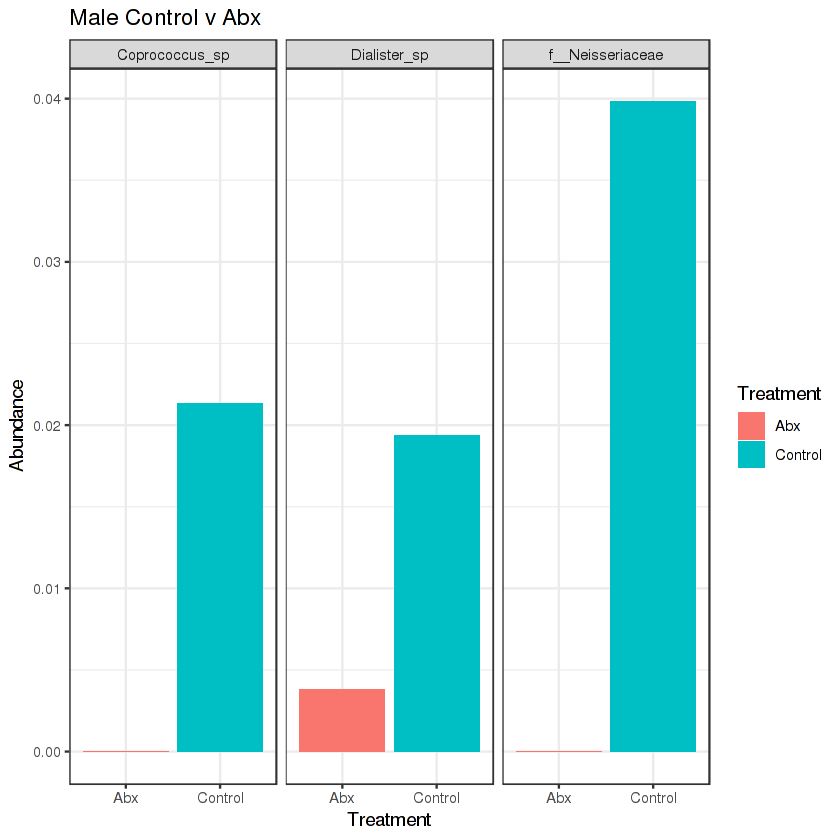

In [44]:
p = ggplot(m.control_abx.df.sig, aes(x=Treatment, y=Abundance, fill=Treatment))
p = p + geom_bar(stat="identity") + ggtitle("Male Control v Abx")
p = p + facet_wrap(~Taxon)
p = p + theme_bw()

p

#### Male Abx vs Abx + FMT

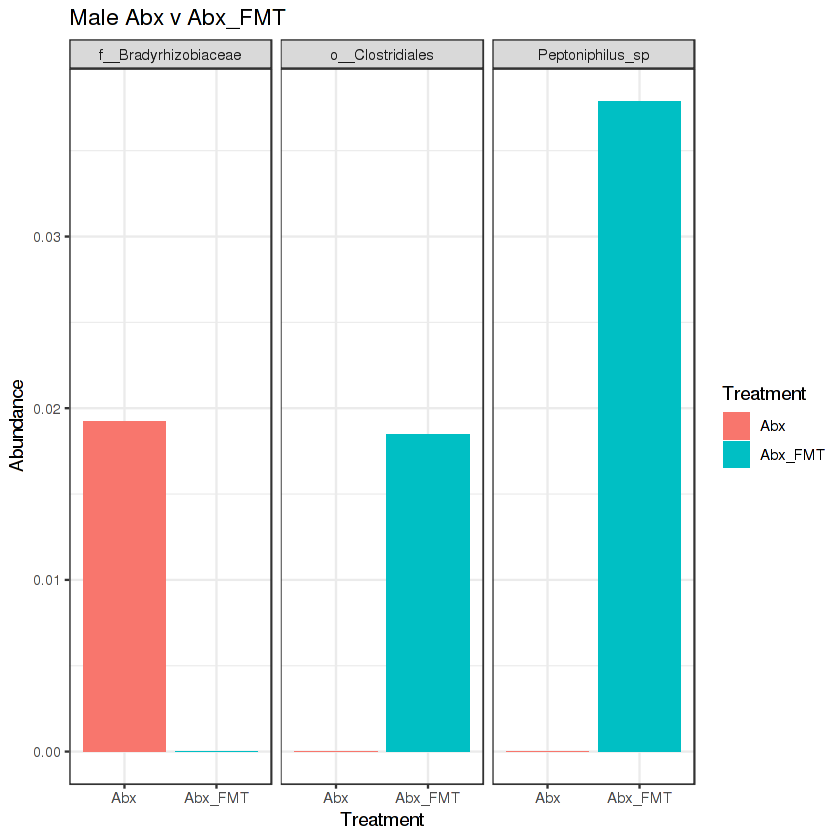

In [41]:
p = ggplot(m.abx_abxfmt.df.sig, aes(x=Treatment, y=Abundance, fill=Treatment))
p = p + geom_bar(stat="identity") + ggtitle("Male Abx v Abx_FMT")
p = p + facet_wrap(~Taxon)
p = p + theme_bw()

p

#### Male control vs Abx + FMT

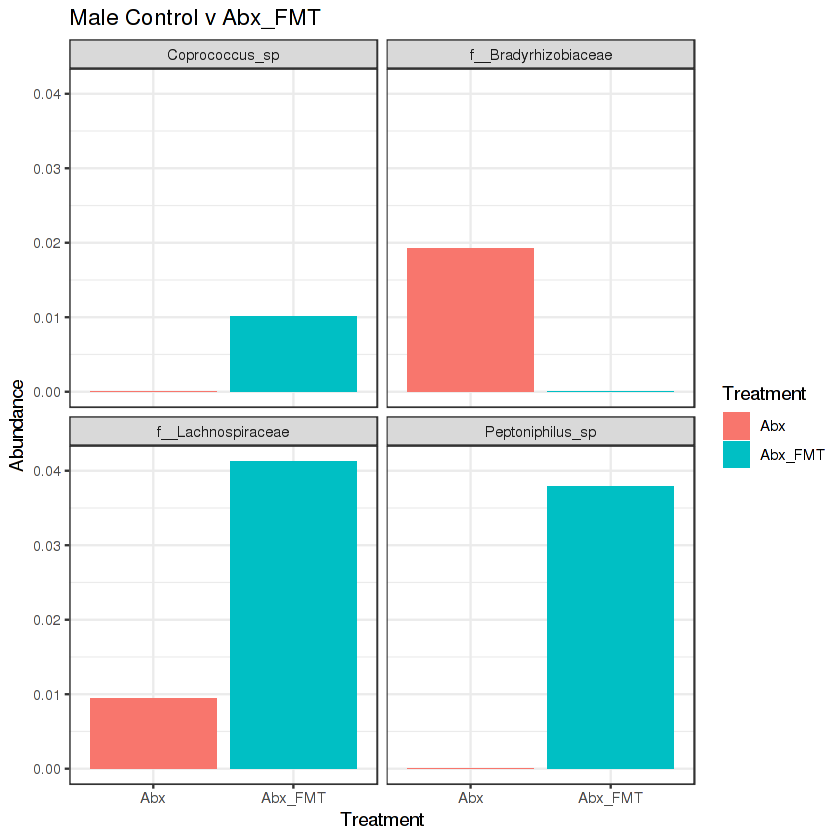

In [40]:
p = ggplot(m.control_abxfmt.df.sig, aes(x=Treatment, y=Abundance, fill=Treatment))
p = p + geom_bar(stat="identity") + ggtitle("Male Control v Abx_FMT")
p = p + facet_wrap(~Taxon)
p = p + theme_bw()

p

#### Female Control vs Abx

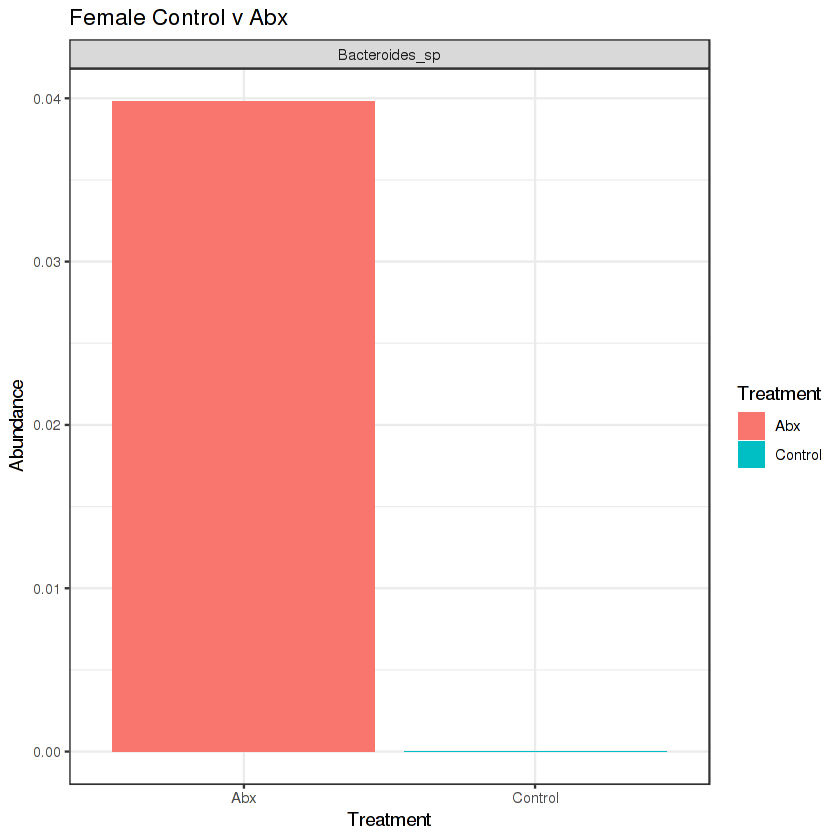

In [43]:
p = ggplot(f.control_abx.df.sig, aes(x=Treatment, y=Abundance, fill=Treatment))
p = p + geom_bar(stat="identity") + ggtitle("Female Control v Abx")
p = p + facet_wrap(~Taxon)
p = p + theme_bw()

p

#### Control mice by Sex

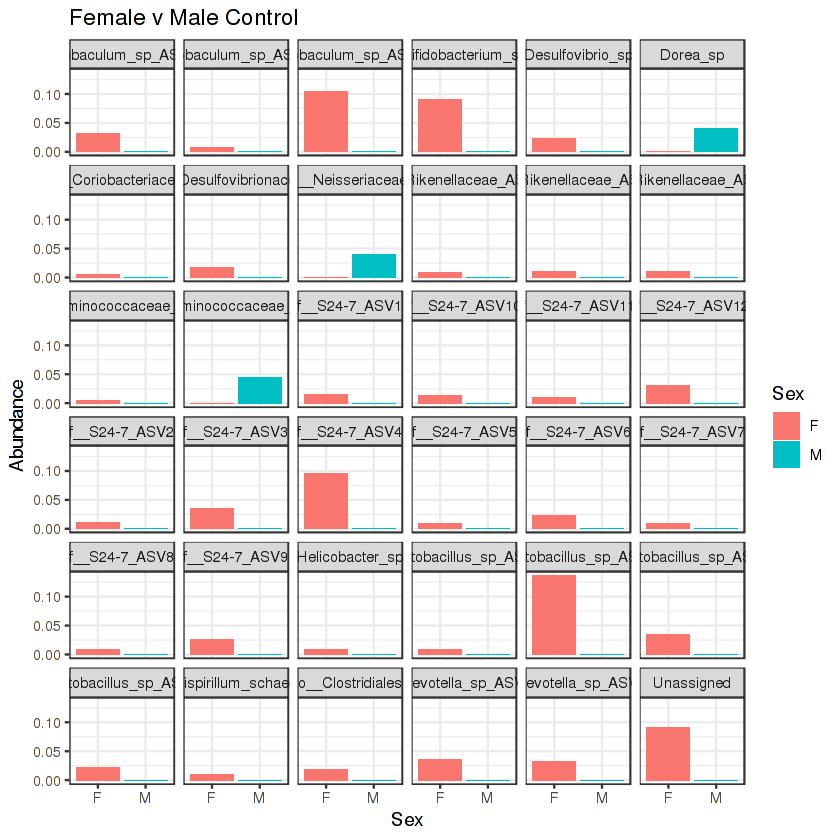

In [37]:
p = ggplot(m.f.control.df.sig, aes(x=Sex, y=Abundance, fill=Sex))
p = p + geom_bar(stat="identity") + ggtitle("Female v Male Control")
p = p + facet_wrap(~Taxon)
p = p + theme_bw()

p

#### Abx mice by Sex

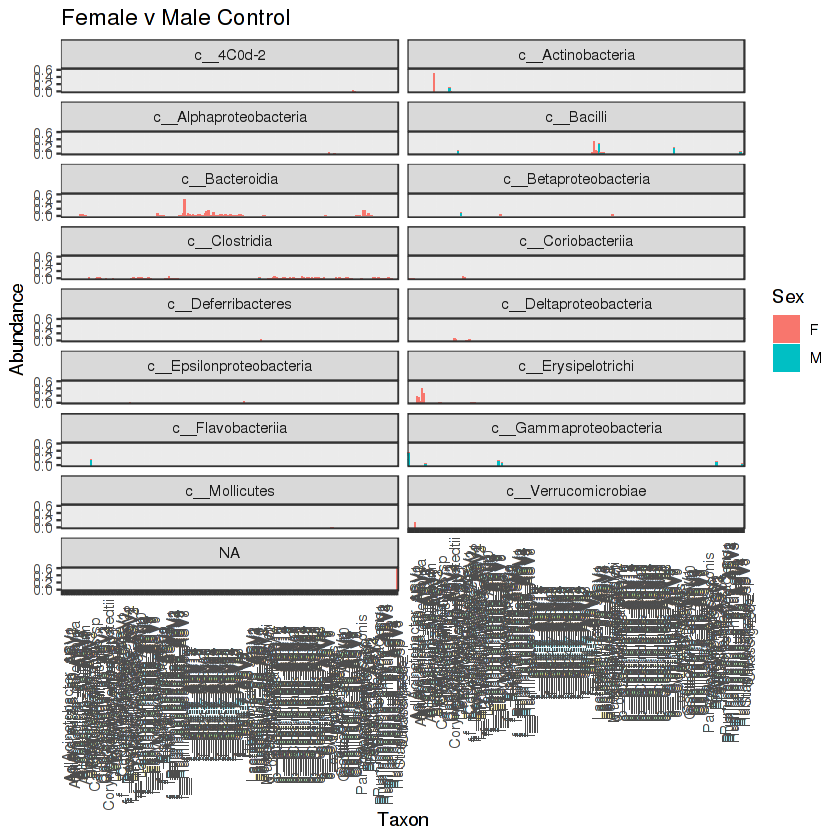

In [73]:
p = ggplot(m.f.abx.df.sig, aes(x=Taxon, y=Abundance, fill=Sex))
p = p + geom_bar(stat="identity") + ggtitle("Female v Male Control")
p = p + facet_wrap(~Rank3, ncol=2)
p = p + theme_bw() + theme(axis.text.x = element_text(angle = 90))

p

### Rune DESeq2 to get log2Fold change values

In [27]:
library(DESeq2)

In [53]:
#Subset to Male only and treatment comparisons
alz_nt_m = subset_samples(alz_nt, Sex=="M")
m.control_abx = subset_samples(alz_nt_m, Treatment !="Abx_FMT")
m.control_abxfmt = subset_samples(alz_nt_m, Treatment !="Abx")
m.abx_abxfmt = subset_samples(alz_nt_m, Treatment !="Control")
#Remove empty ASVs
m.control_abx = prune_samples(sample_sums(m.control_abx)>0, m.control_abx)
m.control_abxfmt = prune_samples(sample_sums(m.control_abxfmt)>0, m.control_abxfmt)
m.abx_abxfmt = prune_samples(sample_sums(m.abx_abxfmt)>0, m.abx_abxfmt)

#Subset to Female only and treatment comparisons
alz_nt_f = subset_samples(alz_nt, Sex=="F")
#Remove empty ASVs
alz_nt_f = prune_samples(sample_sums(alz_nt_f)>0, alz_nt_f)

#Subset to Control and ABX only for sex comparisons
alz_nt_control = subset_samples(alz_nt, Treatment=="Control")
alz_nt_abx = subset_samples(alz_nt, Treatment=="Abx")
#Remove empty ASVs
alz_nt_control = prune_samples(sample_sums(alz_nt_control)>0, alz_nt_control)
alz_nt_abx = prune_samples(sample_sums(alz_nt_abx)>0, alz_nt_abx)

In [54]:
#Convert phyloseq to deseq
#Males
m.control_abx_dds = phyloseq_to_deseq2(m.control_abx, ~Treatment)
m.control_abx_dds$Treatment <- relevel(m.control_abx_dds$Treatment, ref = "Control")
m.control_abxfmt_dds = phyloseq_to_deseq2(m.control_abxfmt, ~Treatment)
m.control_abxfmt_dds$Treatment <- relevel(m.control_abxfmt_dds$Treatment, ref = "Control")
m.abx_abxfmt_dds = phyloseq_to_deseq2(m.abx_abxfmt, ~Treatment)
m.abx_abxfmt_dds$Treatment <- relevel(m.abx_abxfmt_dds$Treatment, ref = "Abx")
#Females
f.control_abx_dds = phyloseq_to_deseq2(alz_nt_f, ~Treatment)
f.control_abx_dds$Treatment <- relevel(f.control_abx_dds$Treatment, ref = "Control")
#Treatments between sexes
m.f.control_dds = phyloseq_to_deseq2(alz_nt_control, ~Sex)
m.f.control_dds$Treatment <- relevel(m.f.control_dds$Sex, ref = "F")
m.f.abx_dds = phyloseq_to_deseq2(alz_nt_abx, ~Sex)
m.f.abx_dds$Treatment <- relevel(m.f.abx_dds$Sex, ref = "F")

Loading required namespace: DESeq2
converting counts to integer mode
it appears that the last variable in the design formula, 'Treatment',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').
converting counts to integer mode
it appears that the last variable in the design formula, 'Treatment',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').
converting counts to integer mode
converting counts to integer mode
it appears that the last variable in the design formula, 'Treatment',
  has a factor level, 'Control', which is not the reference level. we recommend
  to 

In [42]:
#Run DESeq - m.control_abx_dds

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(m.control_abx_dds), 1, gm_mean)


m.control_abx_dds = estimateSizeFactors(m.control_abx_dds, geoMeans = geoMeans)
m.control_abx_dds = estimateDispersions(m.control_abx_dds)
abund = getVarianceStabilizedData(m.control_abx_dds)

m.control_abx_dds = DESeq(m.control_abx_dds, test="Wald", fitType="parametric")

res = results(m.control_abx_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(m.control_abx)[rownames(res), ], "matrix"))

alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(m.control_abx)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.control_abx_dds.log2fold.csv")
write.csv(sigtab, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.control_abx_dds.05.sig.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 989 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [71]:
#Run DESeq - m.control_abxfmt_dds

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(m.control_abxfmt_dds), 1, gm_mean)


m.control_abxfmt_dds = estimateSizeFactors(m.control_abxfmt_dds, geoMeans = geoMeans)
m.control_abxfmt_dds = estimateDispersions(m.control_abxfmt_dds)
abund = getVarianceStabilizedData(m.control_abxfmt_dds)

m.control_abxfmt_dds = DESeq(m.control_abxfmt_dds, test="Wald", fitType="parametric")

res = results(m.control_abxfmt_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(m.control_abxfmt)[rownames(res), ], "matrix"))

alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(m.control_abxfmt)[rownames(sigtab), ], "matrix"))

#write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.control_abxfmt_dds.log2fold.csv")
write.csv(sigtab, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.control_abxfmt_dds.05.sig.log2fold.csv")


found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1177 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [44]:
#Run DESeq - m.abx_abxfmt_dds

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(m.abx_abxfmt_dds), 1, gm_mean)


m.abx_abxfmt_dds = estimateSizeFactors(m.abx_abxfmt_dds, geoMeans = geoMeans)
m.abx_abxfmt_dds = estimateDispersions(m.abx_abxfmt_dds)
abund = getVarianceStabilizedData(m.abx_abxfmt_dds)

m.abx_abxfmt_dds = DESeq(m.abx_abxfmt_dds, test="Wald", fitType="parametric")

res = results(m.abx_abxfmt_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(m.abx_abxfmt)[rownames(res), ], "matrix"))

alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(m.abx_abxfmt)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.abx_abxfmt_dds.log2fold.csv")
write.csv(sigtab, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.abx_abxfmt_dds.05.sig.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 913 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [45]:
#Run DESeq - f.control_abx_dds

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(f.control_abx_dds), 1, gm_mean)


f.control_abx_dds = estimateSizeFactors(f.control_abx_dds, geoMeans = geoMeans)
f.control_abx_dds = estimateDispersions(f.control_abx_dds)
abund = getVarianceStabilizedData(f.control_abx_dds)

f.control_abx_dds = DESeq(f.control_abx_dds, test="Wald", fitType="parametric")

res = results(f.control_abx_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(alz_nt_f)[rownames(res), ], "matrix"))

alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(alz_nt_f)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/f.control_abx_dds.log2fold.csv")
write.csv(sigtab, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/f.control_abx_dds.05.sig.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1085 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [46]:
#Run DESeq - m.f.control_dds

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(m.f.control_dds), 1, gm_mean)


m.f.control_dds = estimateSizeFactors(m.f.control_dds, geoMeans = geoMeans)
m.f.control_dds = estimateDispersions(m.f.control_dds)
abund = getVarianceStabilizedData(m.f.control_dds)

m.f.control_dds = DESeq(m.f.control_dds, test="Wald", fitType="parametric")

res = results(m.f.control_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(alz_nt_control)[rownames(res), ], "matrix"))

alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(alz_nt_control)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.f.control_dds.log2fold.csv")
write.csv(sigtab, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.f.control_dds.05.sig.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1356 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [47]:
#Run DESeq - m.f.abx_dds

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(m.f.abx_dds), 1, gm_mean)


m.f.abx_dds = estimateSizeFactors(m.f.abx_dds, geoMeans = geoMeans)
m.f.abx_dds = estimateDispersions(m.f.abx_dds)
abund = getVarianceStabilizedData(m.f.abx_dds)

m.f.abx_dds = DESeq(m.f.abx_dds, test="Wald", fitType="parametric")

res = results(m.f.abx_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(alz_nt_abx)[rownames(res), ], "matrix"))

alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(alz_nt_abx)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.f.abx_dds.log2fold.csv")
write.csv(sigtab, file="/gpfs/data/gilbert-lab/Lutz/Alzheimers/ANCOM/DESeq/m.f.abx_dds.05.sig.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 788 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


#### ANCOM Code from Knight Lab

In [42]:
library(exactRankTests)
library(nlme)
library(ggplot2)

ancom.W = function(otu_data,var_data,
                   adjusted,repeated,
                   main.var,adj.formula,
                   repeat.var,long,rand.formula,
                   multcorr,sig){
  
  n_otu=dim(otu_data)[2]-1
  
  otu_ids=colnames(otu_data)[-1]
  
  if(repeated==F){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID",all.y=T),row.names=NULL)
    #data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var)],by="Sample.ID",all.y=T),row.names=NULL)
  }else if(repeated==T){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID"),row.names=NULL)
   # data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var,repeat.var)],by="Sample.ID"),row.names=NULL)
  }
  
  base.formula = paste0("lr ~ ",main.var)
  if(repeated==T){
    repeat.formula = paste0(base.formula," | ", repeat.var)
  }
  if(adjusted==T){
    adjusted.formula = paste0(base.formula," + ", adj.formula)
  }
  
  if( adjusted == F & repeated == F ){
    fformula  <- formula(base.formula)
  } else if( adjusted == F & repeated == T & long == T ){
    fformula  <- formula(base.formula)   
  }else if( adjusted == F & repeated == T & long == F ){
    fformula  <- formula(repeat.formula)   
  }else if( adjusted == T & repeated == F  ){
    fformula  <- formula(adjusted.formula)   
  }else if( adjusted == T & repeated == T  ){
    fformula  <- formula(adjusted.formula)   
  }else{
    stop("Problem with data. Dataset should contain OTU abundances, groups, 
         and optionally an ID for repeated measures.")
  }
  
  
  
    if( repeated==FALSE & adjusted == FALSE){
       if( length(unique(data_comp[,which(colnames(data_comp)==main.var)]))==2 ){
          tfun <- exactRankTests::wilcox.exact
       } else{
          tfun <- stats::kruskal.test
    }
    }else if( repeated==FALSE & adjusted == TRUE){
      tfun <- stats::aov
    }else if( repeated== TRUE & adjusted == FALSE & long == FALSE){
      tfun <- stats::friedman.test
    }else if( repeated== TRUE & adjusted == FALSE & long == TRUE){
      tfun <- nlme::lme
    }else if( repeated== TRUE & adjusted == TRUE){
      tfun <- nlme::lme
    }
  
  logratio.mat <- matrix(NA, nrow=n_otu, ncol=n_otu)
  for(ii in 1:(n_otu-1)){
    for(jj in (ii+1):n_otu){
      data.pair <- data_comp[,which(colnames(data_comp)%in%otu_ids[c(ii,jj)])]
      lr <- log((1+as.numeric(data.pair[,1]))/(1+as.numeric(data.pair[,2])))
      
      lr_dat <- data.frame( lr=lr, data_comp,row.names=NULL )
      
      if(adjusted==FALSE&repeated==FALSE){  ## Wilcox, Kruskal Wallis
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==FALSE&repeated==TRUE&long==FALSE){ ## Friedman's 
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==TRUE&repeated==FALSE){ ## ANOVA
        model=tfun(formula=fformula, data = lr_dat,na.action=na.omit)   
        picker=which(gsub(" ","",row.names(summary(model)[[1]]))==main.var)  
        logratio.mat[ii,jj] <- summary(model)[[1]][["Pr(>F)"]][picker]
      }else if(repeated==TRUE&long==TRUE){ ## GEE
        model=tfun(fixed=fformula,data = lr_dat,
                   random = formula(rand.formula),
                   correlation=corAR1(),
                   na.action=na.omit)   
        picker=which(gsub(" ","",row.names(anova(model)))==main.var)
        logratio.mat[ii,jj] <- anova(model)[["p-value"]][picker]
      }
      
    }
  } 
  
  ind <- lower.tri(logratio.mat)
  logratio.mat[ind] <- t(logratio.mat)[ind]
  
  
  logratio.mat[which(is.finite(logratio.mat)==FALSE)] <- 1
  
  mc.pval <- t(apply(logratio.mat,1,function(x){
    s <- p.adjust(x, method = "BH")
    return(s)
  }))
  
  a <- logratio.mat[upper.tri(logratio.mat,diag=FALSE)==TRUE]
  
  b <- matrix(0,ncol=n_otu,nrow=n_otu)
  b[upper.tri(b)==T] <- p.adjust(a, method = "BH")
  diag(b)  <- NA
  ind.1    <- lower.tri(b)
  b[ind.1] <- t(b)[ind.1]
  
  #########################################
  ### Code to extract surrogate p-value
  surr.pval <- apply(mc.pval,1,function(x){
    s0=quantile(x[which(as.numeric(as.character(x))<sig)],0.95)
    # s0=max(x[which(as.numeric(as.character(x))<alpha)])
    return(s0)
  })
  #########################################
  ### Conservative
  if(multcorr==1){
    W <- apply(b,1,function(x){
      subp <- length(which(x<sig))
    })
    ### Moderate
  } else if(multcorr==2){
    W <- apply(mc.pval,1,function(x){
      subp <- length(which(x<sig))
    })
    ### No correction
  } else if(multcorr==3){
    W <- apply(logratio.mat,1,function(x){
      subp <- length(which(x<sig))
    })
  }
  
  return(W)
  }



ANCOM.main = function(OTUdat,Vardat,
                      adjusted,repeated,
                      main.var,adj.formula,
                      repeat.var,longitudinal,
                      random.formula,
                      multcorr,sig,
                      prev.cut){
  
  p.zeroes=apply(OTUdat[,-1],2,function(x){
    s=length(which(x==0))/length(x)
  })
  
  zeroes.dist=data.frame(colnames(OTUdat)[-1],p.zeroes,row.names=NULL)
  colnames(zeroes.dist)=c("Taxon","Proportion_zero")
  
  zero.plot = ggplot(zeroes.dist, aes(x=Proportion_zero)) + 
              geom_histogram(binwidth=0.1,colour="black",fill="white") + 
              xlab("Proportion of zeroes") + ylab("Number of taxa") +
              theme_bw()
  
  #print(zero.plot)
  
  OTUdat.thinned=OTUdat
  OTUdat.thinned=OTUdat.thinned[,c(1,1+which(p.zeroes<prev.cut))]
  
  otu.names=colnames(OTUdat.thinned)[-1]
  
  W.detected   <- ancom.W(OTUdat.thinned,Vardat,
                          adjusted,repeated,
                          main.var,adj.formula,
                          repeat.var,longitudinal,random.formula,
                          multcorr,sig)
  
  W_stat       <- W.detected
  
  
  ### Bubble plot
  
  W_frame = data.frame(otu.names,W_stat,row.names=NULL)
  W_frame = W_frame[order(-W_frame$W_stat),]
  
  W_frame$detected_0.9=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.8=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.7=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.6=rep(FALSE,dim(W_frame)[1])
  
  W_frame$detected_0.9[which(W_frame$W_stat>0.9*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.8[which(W_frame$W_stat>0.8*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.7[which(W_frame$W_stat>0.7*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.6[which(W_frame$W_stat>0.6*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  
  final_results=list(W_frame,zero.plot)
  names(final_results)=c("W.taxa","PLot.zeroes")
  return(final_results)
    }

 Package ‘exactRankTests’ is no longer under development.
 Please consider using package ‘coin’ instead.


Attaching package: ‘nlme’

The following object is masked from ‘package:IRanges’:

    collapse

The following object is masked from ‘package:dplyr’:

    collapse

